# Baseline Models

### Prepare the Data

In [1]:
import warnings
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import linear_model
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report

warnings.filterwarnings("ignore", category=FutureWarning)

/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Read the data into data frames.
train_images = pd.read_csv('volcanoesvenus/Volcanoes_train/train_images.csv', header=-1)
train_labels = pd.read_csv('volcanoesvenus/Volcanoes_train/train_labels.csv')

In [3]:
train_labels.head(3)

,Volcano?,Type,Radius,Number Volcanoes
0,1,3.0,17.46,1.0
1,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN


In [431]:
test_images = pd.read_csv('volcanoesvenus/Volcanoes_test/test_images.csv', header=-1)
test_labels = pd.read_csv('volcanoesvenus/Volcanoes_test/test_labels.csv')

In [432]:
# Check the shape
print(train_images.shape)
print(test_images.shape)

(7000, 12100)
(2734, 12100)


In [433]:
test_images.head()

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,107,116,108,101,107,109,108,110,100,109,...,111,110,109,109,101,106,106,117,130,134
1,93,95,98,100,90,100,108,98,90,103,...,86,93,59,88,89,89,92,99,92,113
2,108,108,92,116,116,140,126,104,112,103,...,118,111,113,107,107,121,141,160,131,138
3,165,164,156,159,151,120,103,114,114,116,...,69,96,109,91,94,83,48,69,86,75
4,105,106,84,115,121,103,94,108,103,91,...,92,89,96,89,91,102,99,90,90,73


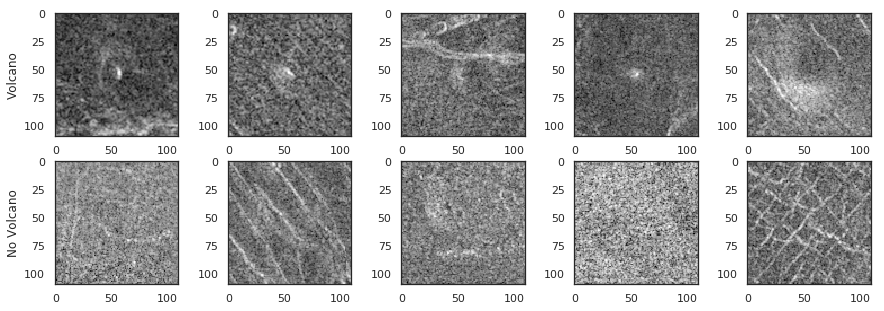

In [434]:
# Visualize what a positive and negative classification look like.
volcano_positive = train_images[train_labels['Volcano?'] == 1].sample(5)
volcano_negative = train_images[train_labels['Volcano?'] == 0].sample(5)
sns.set_style('white')

plt.subplots(figsize = (15, 5))
plt.xlabel(None)
sns.despine
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(volcano_positive.iloc[i, :].values.reshape((110, 110)), cmap='gray')
    if i == 0:
        plt.ylabel('Volcano')
for i in range(5):
    plt.subplot(2, 5, i+6)
    if i == 0:
        plt.ylabel('No Volcano')
    plt.imshow(volcano_negative.iloc[i, :].values.reshape((110, 110)), cmap='gray')

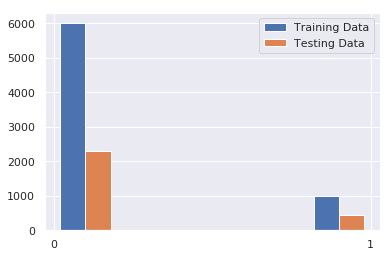

In [435]:
# Graph data distribution.
sns.set_style('darkgrid')
sns.color_palette("Paired")
sns.despine

legend = ['Training Data', 'Testing Data']
plt.hist([y_train, y_test], bins=5)
plt.legend(legend)
plt.xticks(range(2))
plt.show()

In [436]:
# Get value counts.
print(y_train.value_counts())
print(y_test.value_counts())

0    6000
1    1000
Name: Volcano?, dtype: int64
0    2300
1     434
Name: Volcano?, dtype: int64


In [437]:
print(train_labels.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 4 columns):
Volcano?            7000 non-null int64
Type                1000 non-null float64
Radius              1000 non-null float64
Number Volcanoes    1000 non-null float64
dtypes: float64(3), int64(1)
memory usage: 218.8 KB
None


In [438]:
X_train = train_images / 255
X_test = test_images / 255
y_train = train_labels['Volcano?']
y_test = test_labels['Volcano?']

### Train the Baseline Models

#### Random Forest

In [374]:
rfc = RandomForestClassifier(n_estimators=100, random_state=3)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=3, verbose=0, warm_start=False)

In [385]:
# Create a function to get performance information for each model.
def get_classification_stats(model, X_train, X_test, y_train, y_test):
    
    print('Accuracy on train data')
    print(model.score(X_train, y_train), '\n')
    print('Accuracy on test data')
    print(model.score(X_test, y_test), '\n')
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Confusion Matrix
    print('Confusion matrix on training data')
    print(confusion_matrix(y_train, y_pred_train))
    print('Confusion matrix on testing data')
    print(confusion_matrix(y_test, y_pred_test), '\n')

    # Recall/Sensitivity
    print('Recall score on training data')
    print(recall_score(y_train, y_pred_train))
    print('Recall score on testing data')
    print(recall_score(y_test, y_pred_test), '\n')

    # Specificity
    print('Specificity on training data')
    print(confusion_matrix(y_train, y_pred_train)[0][0] / 
          (confusion_matrix(y_train, y_pred_train)[0][0] + confusion_matrix(y_train, y_pred_train)[0][1]))
    print('Specificity on testing data')
    print(confusion_matrix(y_test, y_pred_test)[0][0] / 
          (confusion_matrix(y_test, y_pred_test)[0][0] + confusion_matrix(y_test, y_pred_test)[0][1]), '\n')
    # Precision
    print('Precision score on training data')
    print(precision_score(y_train, y_pred_train))
    print('Precision score on testing data')
    print(precision_score(y_test, y_pred_test), '\n')

    # F1 Score
    print('F1 score on training data')
    print(f1_score(y_train, y_pred_train))
    print('F1 score on testing data')
    print(f1_score(y_test, y_pred_test))
    
    return None

In [386]:
get_classification_stats(rfc, X_train, X_test, y_train, y_test)

Accuracy on train data
1.0 

Accuracy on test data
0.908558888076079 

Confusion matrix on training data
[[6000    0]
 [   0 1000]]
Confusion matrix on testing data
[[2283   17]
 [ 233  201]] 

Recall score on training data
1.0
Recall score on testing data
0.4631336405529954 

Specificity on training data
1.0
Specificity on testing data
0.9926086956521739 

Precision score on training data
1.0
Precision score on testing data
0.9220183486238532 

F1 score on training data
1.0
F1 score on testing data
0.6165644171779141


#### Gradient Boosting

In [378]:
params = {'n_estimators': 100,
          'max_depth': 3,
          'loss': 'deviance',
          'subsample': 1}

gboost_clf = GradientBoostingClassifier(**params, random_state=3)
gboost_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=3,
              subsample=1, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False)

In [387]:
get_classification_stats(gboost_clf, X_train, X_test, y_train, y_test)

Accuracy on train data
0.9655714285714285 

Accuracy on test data
0.923555230431602 

Confusion matrix on training data
[[5991    9]
 [ 232  768]]
Confusion matrix on testing data
[[2278   22]
 [ 187  247]] 

Recall score on training data
0.768
Recall score on testing data
0.5691244239631337 

Specificity on training data
0.9985
Specificity on testing data
0.9904347826086957 

Precision score on training data
0.9884169884169884
Precision score on testing data
0.9182156133828996 

F1 score on training data
0.8643781654473833
F1 score on testing data
0.7027027027027027


#### XGBoost

In [388]:
xgb = XGBClassifier(random_state=3)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=3,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [389]:
get_classification_stats(xgb, X_train, X_test, y_train, y_test)

Accuracy on train data
0.969 

Accuracy on test data
0.9261155815654718 

Confusion matrix on training data
[[5991    9]
 [ 208  792]]
Confusion matrix on testing data
[[2278   22]
 [ 180  254]] 

Recall score on training data
0.792
Recall score on testing data
0.5852534562211982 

Specificity on training data
0.9985
Specificity on testing data
0.9904347826086957 

Precision score on training data
0.9887640449438202
Precision score on testing data
0.9202898550724637 

F1 score on training data
0.8795113825652415
F1 score on testing data
0.7154929577464789


#### Ridge Regression

In [181]:
# Train a ridge regression model with different regularization penalties.
for i in [1, 10, 100, 1000, 10000]:
    ridgeregr = linear_model.LogisticRegression(
        penalty='l2', fit_intercept=True, C=i)
    ridgeregr.fit(X_train, y_train)

    print(40 * '#', '\n')
    print('Lambda is {}'.format(1/i))
    print('Accuracy on training data for ridge regression:')
    print(ridgeregr.score(X_train, y_train), '\n')
    print('Accuracy on test data for ridge regression:')
    print(ridgeregr.score(X_test, y_test), '\n')

######################################## 

Lambda is 1.0
R-squared on training data for ridge regression:
0.9985714285714286 

R-squared on test data for ridge regression:
0.9268471104608632 

######################################## 

Lambda is 0.1
R-squared on training data for ridge regression:
1.0 

R-squared on test data for ridge regression:
0.9264813460131676 

######################################## 

Lambda is 0.01
R-squared on training data for ridge regression:
1.0 

R-squared on test data for ridge regression:
0.9268471104608632 

######################################## 

Lambda is 0.001
R-squared on training data for ridge regression:
1.0 

R-squared on test data for ridge regression:
0.9257498171177762 

######################################## 

Lambda is 0.0001
R-squared on training data for ridge regression:
1.0 

R-squared on test data for ridge regression:
0.9257498171177762 



In [390]:
# Choose the best one.
ridgeregr = linear_model.LogisticRegression(penalty='l2', fit_intercept=True, C=100, random_state=3)
ridgeregr.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=3, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [391]:
get_classification_stats(ridgeregr, X_train, X_test, y_train, y_test)

Accuracy on train data
1.0 

Accuracy on test data
0.9268471104608632 

Confusion matrix on training data
[[6000    0]
 [   0 1000]]
Confusion matrix on testing data
[[2249   51]
 [ 149  285]] 

Recall score on training data
1.0
Recall score on testing data
0.6566820276497696 

Specificity on training data
1.0
Specificity on testing data
0.9778260869565217 

Precision score on training data
1.0
Precision score on testing data
0.8482142857142857 

F1 score on training data
1.0
F1 score on testing data
0.7402597402597404


#### Lasso Regression

In [182]:
for i in [.1, 1, 10, 100, 1000, 10000]:
    lass = linear_model.LogisticRegression(
        penalty='l1', fit_intercept=False, C=i)
    lass.fit(X_train, y_train)

    print(40 * '#', '\n')
    print('Lambda is {}'.format(1/i))
    print('Accuracy on training data for lasso regression:')
    print(lass.score(X_train, y_train), '\n')
    print('Accuracy on test data for lasso regression:')
    print(lass.score(X_test, y_test), '\n')

######################################## 

Lambda is 10.0
R-squared on training data for lasso regression:
0.9142857142857143 

R-squared on test data for lasso regression:
0.8975859546452085 

######################################## 

Lambda is 1.0
R-squared on training data for lasso regression:
0.9704285714285714 

R-squared on test data for lasso regression:
0.929407461594733 

######################################## 

Lambda is 0.1
R-squared on training data for lasso regression:
1.0 

R-squared on test data for lasso regression:
0.9213606437454279 

######################################## 

Lambda is 0.01
R-squared on training data for lasso regression:
1.0 

R-squared on test data for lasso regression:
0.9228237015362106 

######################################## 

Lambda is 0.001
R-squared on training data for lasso regression:
1.0 

R-squared on test data for lasso regression:
0.9231894659839064 

######################################## 

Lambda is 0.0001
R-squared on trai

In [392]:
lass = linear_model.LogisticRegression(penalty='l1', fit_intercept=False, C=1, random_state=3)
lass.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=3, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [394]:
get_classification_stats(lass, X_train, X_test, y_train, y_test)

Accuracy on train data
0.9702857142857143 

Accuracy on test data
0.9283101682516459 

Confusion matrix on training data
[[5983   17]
 [ 191  809]]
Confusion matrix on testing data
[[2258   42]
 [ 154  280]] 

Recall score on training data
0.809
Recall score on testing data
0.6451612903225806 

Specificity on training data
0.9971666666666666
Specificity on testing data
0.9817391304347826 

Precision score on training data
0.9794188861985472
Precision score on testing data
0.8695652173913043 

F1 score on training data
0.8860898138006572
F1 score on testing data
0.7407407407407407


#### Logistic Regression

In [395]:
lr = linear_model.LogisticRegression(fit_intercept=False, random_state=3)
lr.fit(X_train, y_train)

In [396]:
get_classification_stats(lr, X_train, X_test, y_train, y_test)

Accuracy on train data
0.9981428571428571 

Accuracy on test data
0.9250182882223847 

Confusion matrix on training data
[[6000    0]
 [  13  987]]
Confusion matrix on testing data
[[2254   46]
 [ 159  275]] 

Recall score on training data
0.987
Recall score on testing data
0.6336405529953917 

Specificity on training data
1.0
Specificity on testing data
0.98 

Precision score on training data
1.0
Precision score on testing data
0.8566978193146417 

F1 score on training data
0.9934574735782586
F1 score on testing data
0.7284768211920529


#### Support Vector Machines

In [422]:
# Kernel must be linear to accomodate for n < p
svm = SVC(random_state=3, kernel='linear')
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=3,
  shrinking=True, tol=0.001, verbose=False)

In [423]:
get_classification_stats(svm, X_train, X_test, y_train, y_test)

Accuracy on train data
1.0 

Accuracy on test data
0.9173372348207754 

Confusion matrix on training data
[[6000    0]
 [   0 1000]]
Confusion matrix on testing data
[[2221   79]
 [ 147  287]] 

Recall score on training data
1.0
Recall score on testing data
0.6612903225806451 

Specificity on training data
1.0
Specificity on testing data
0.9656521739130435 

Precision score on training data
1.0
Precision score on testing data
0.7841530054644809 

F1 score on training data
1.0
F1 score on testing data
0.7174999999999999


### PCA

In [403]:
# Reduce the entire image array to just 7 features.
pca = PCA(n_components=7, random_state=3)
train_principal_components = pca.fit_transform(X_train)
test_principal_components = pca.fit_transform(X_test)

#### RF with PCA

In [404]:
rfc_PCA = RandomForestClassifier(n_estimators=100, random_state=3)
rfc_PCA.fit(train_principal_components, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=3, verbose=0, warm_start=False)

In [405]:
get_classification_stats(rfc_PCA, train_principal_components, test_principal_compenents, y_train, y_test)

Accuracy on train data
1.0 

Accuracy on test data
0.8544257498171178 

Confusion matrix on training data
[[6000    0]
 [   0 1000]]
Confusion matrix on testing data
[[2251   49]
 [ 349   85]] 

Recall score on training data
1.0
Recall score on testing data
0.195852534562212 

Specificity on training data
1.0
Specificity on testing data
0.9786956521739131 

Precision score on training data
1.0
Precision score on testing data
0.6343283582089553 

F1 score on training data
1.0
F1 score on testing data
0.29929577464788737


#### Gradient Boosting with PCA

In [406]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance',
          'subsample': 1}

gboost_clf_pca = GradientBoostingClassifier(**params, random_state=3)
gboost_clf_pca.fit(train_principal_components, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=3,
              subsample=1, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False)

In [407]:
get_classification_stats(gboost_clf_pca, train_principal_components,
                         test_principal_components, y_train, y_test)

Accuracy on train data
0.8924285714285715 

Accuracy on test data
0.8452816386247257 

Confusion matrix on training data
[[5952   48]
 [ 705  295]]
Confusion matrix on testing data
[[2226   74]
 [ 349   85]] 

Recall score on training data
0.295
Recall score on testing data
0.195852534562212 

Specificity on training data
0.992
Specificity on testing data
0.9678260869565217 

Precision score on training data
0.8600583090379009
Precision score on testing data
0.5345911949685535 

F1 score on training data
0.43931496649292623
F1 score on testing data
0.2866779089376054


#### XGBoost with PCA

In [408]:
xgb_pca = XGBClassifier(random_state=3)
xgb_pca.fit(train_principal_components, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=3,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [409]:
get_classification_stats(xgb_pca, train_principal_components,
                         test_principal_components, y_train, y_test)

Accuracy on train data
0.8782857142857143 

Accuracy on test data
0.8511338697878567 

Confusion matrix on training data
[[5945   55]
 [ 797  203]]
Confusion matrix on testing data
[[2263   37]
 [ 370   64]] 

Recall score on training data
0.203
Recall score on testing data
0.14746543778801843 

Specificity on training data
0.9908333333333333
Specificity on testing data
0.9839130434782609 

Precision score on training data
0.7868217054263565
Precision score on testing data
0.6336633663366337 

F1 score on training data
0.32273449920508746
F1 score on testing data
0.23925233644859814


#### PCA Ridge

In [324]:
for i in [1, 10, 100, 1000, 10000]:
    ridgeregr_pca = linear_model.LogisticRegression(penalty='l2', fit_intercept=True, C=i)
    ridgeregr_pca.fit(train_principal_components, y_train)
    
    print(40 * '#', '\n')    
    print('Lambda is {}'.format(1/i))
    print('Accuracy on PCA train data for ridge regression:')
    print(ridgeregr_pca.score(train_principal_components, y_train), '\n')
    print('Accuracy on PCA test data for ridge regression:')
    print(ridgeregr_pca.score(test_principal_compenents, y_test), '\n')

######################################## 

Lambda is 1.0
Accuracy on PCA train data for ridge regression:
0.8544285714285714 

Accuracy on PCA test data for ridge regression:
0.8361375274323336 

######################################## 

Lambda is 0.1
Accuracy on PCA train data for ridge regression:
0.8544285714285714 

Accuracy on PCA test data for ridge regression:
0.8361375274323336 

######################################## 

Lambda is 0.01
Accuracy on PCA train data for ridge regression:
0.8544285714285714 

Accuracy on PCA test data for ridge regression:
0.8361375274323336 

######################################## 

Lambda is 0.001
Accuracy on PCA train data for ridge regression:
0.8544285714285714 

Accuracy on PCA test data for ridge regression:
0.8361375274323336 

######################################## 

Lambda is 0.0001
Accuracy on PCA train data for ridge regression:
0.8544285714285714 

Accuracy on PCA test data for ridge regression:
0.8361375274323336 



In [410]:
ridgeregr_pca = linear_model.LogisticRegression(penalty='l2', fit_intercept=True, C=1, random_state=3)
ridgeregr_pca.fit(train_principal_components, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=3, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [411]:
get_classification_stats(ridgeregr_pca, train_principal_components,
                         test_principal_components, y_train, y_test)

Accuracy on train data
0.8544285714285714 

Accuracy on test data
0.8361375274323336 

Confusion matrix on training data
[[5950   50]
 [ 969   31]]
Confusion matrix on testing data
[[2271   29]
 [ 419   15]] 

Recall score on training data
0.031
Recall score on testing data
0.03456221198156682 

Specificity on training data
0.9916666666666667
Specificity on testing data
0.9873913043478261 

Precision score on training data
0.38271604938271603
Precision score on testing data
0.3409090909090909 

F1 score on training data
0.05735430157261795
F1 score on testing data
0.06276150627615062


#### PCA Lasso

In [190]:
for i in [.1, 1, 10, 100, 1000, 10000]:
    lass_pca = linear_model.LogisticRegression(
        penalty='l1', fit_intercept=True, C=i)
    lass_pca.fit(train_principal_components, y_train)

    print(40 * '#', '\n')
    print('Lambda is {}'.format(1/i))
    print('Accuracy on PCA train data for lasso regression:')
    print(lass_pca.score(train_principal_components, y_train), '\n')
    print('Accuracy on PCA test data for lasso regression:')
    print(lass_pca.score(test_principal_compenents, y_test), '\n')

######################################## 

Lambda is 10.0
R-squared on PCA train data for lasso regression:
0.855 

R-squared on PCA test data for lasso regression:
0.837966349670812 

######################################## 

Lambda is 1.0
R-squared on PCA train data for lasso regression:
0.8547142857142858 

R-squared on PCA test data for lasso regression:
0.8365032918800293 

######################################## 

Lambda is 0.1
R-squared on PCA train data for lasso regression:
0.8544285714285714 

R-squared on PCA test data for lasso regression:
0.8361375274323336 

######################################## 

Lambda is 0.01
R-squared on PCA train data for lasso regression:
0.8544285714285714 

R-squared on PCA test data for lasso regression:
0.8361375274323336 

######################################## 

Lambda is 0.001
R-squared on PCA train data for lasso regression:
0.8544285714285714 

R-squared on PCA test data for lasso regression:
0.8361375274323336 

####################

In [412]:
lass_pca = linear_model.LogisticRegression(
        penalty='l1', fit_intercept=True, C=.1, random_state=3)
lass_pca.fit(train_principal_components, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=3, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [413]:
get_classification_stats(lass_pca, train_principal_components, test_principal_components, y_train, y_test)

Accuracy on train data
0.855 

Accuracy on test data
0.837966349670812 

Confusion matrix on training data
[[5959   41]
 [ 974   26]]
Confusion matrix on testing data
[[2278   22]
 [ 421   13]] 

Recall score on training data
0.026
Recall score on testing data
0.029953917050691243 

Specificity on training data
0.9931666666666666
Specificity on testing data
0.9904347826086957 

Precision score on training data
0.3880597014925373
Precision score on testing data
0.37142857142857144 

F1 score on training data
0.048734770384254916
F1 score on testing data
0.05543710021321962


#### PCA Logistic

In [418]:
lr_pca = linear_model.LogisticRegression(fit_intercept=True, random_state=3)
fit = lr_pca.fit(train_principal_components, y_train)

In [419]:
get_classification_stats(lr_pca, train_principal_components, test_principal_components, y_train, y_test)

Accuracy on train data
0.8544285714285714 

Accuracy on test data
0.8361375274323336 

Confusion matrix on training data
[[5950   50]
 [ 969   31]]
Confusion matrix on testing data
[[2271   29]
 [ 419   15]] 

Recall score on training data
0.031
Recall score on testing data
0.03456221198156682 

Specificity on training data
0.9916666666666667
Specificity on testing data
0.9873913043478261 

Precision score on training data
0.38271604938271603
Precision score on testing data
0.3409090909090909 

F1 score on training data
0.05735430157261795
F1 score on testing data
0.06276150627615062


#### SVC with PCA

In [426]:
svm_pca = SVC(random_state=3)
svm_pca.fit(train_principal_components, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=3,
  shrinking=True, tol=0.001, verbose=False)

In [427]:
get_classification_stats(svm_pca, train_principal_components, test_principal_components, y_train, y_test)

Accuracy on train data
0.8667142857142857 

Accuracy on test data
0.8463789319678128 

Confusion matrix on training data
[[5995    5]
 [ 928   72]]
Confusion matrix on testing data
[[2294    6]
 [ 414   20]] 

Recall score on training data
0.072
Recall score on testing data
0.04608294930875576 

Specificity on training data
0.9991666666666666
Specificity on testing data
0.9973913043478261 

Precision score on training data
0.935064935064935
Precision score on testing data
0.7692307692307693 

F1 score on training data
0.13370473537604455
F1 score on testing data
0.08695652173913043
